# Implementation of WaveNet
Create: 04/04/2019 </br>
Todo:
- WaveNet with dilated causal convolutions 

In [33]:
from __future__ import with_statement, print_function, absolute_import
import tensorflow as tf
import numpy as np
import librosa
import os
from glob import glob
import IPython
import matplotlib.pyplot as plt

## 1. Read audio

In [7]:
DATA_DIR = 'D:\\datasets\\VCTK-Corpus\\wav48\\p225'

sound_file = glob(DATA_DIR + '\\*.wav')

In [2]:
# For test only
TEST_DATA_DIR = 'test sound'
sound_file = glob(TEST_DATA_DIR + '/*.wav')

In [3]:
sound_file

['test sound/arctic_a0003.wav',
 'test sound/arctic_a0017.wav',
 'test sound/arctic_a0014.wav',
 'test sound/arctic_a0001.wav',
 'test sound/arctic_a0011.wav',
 'test sound/arctic_a0005.wav',
 'test sound/arctic_a0013.wav',
 'test sound/arctic_a0002.wav',
 'test sound/arctic_a0008.wav',
 'test sound/arctic_a0018.wav',
 'test sound/arctic_a0012.wav',
 'test sound/arctic_a0004.wav',
 'test sound/arctic_a0010.wav',
 'test sound/arctic_a0015.wav',
 'test sound/arctic_a0019.wav',
 'test sound/arctic_a0020.wav',
 'test sound/arctic_a0009.wav',
 'test sound/arctic_a0016.wav',
 'test sound/arctic_a0006.wav',
 'test sound/arctic_a0007.wav']

In [4]:
IPython.display.Audio(sound_file[5])

## 2. Preprocessing 

In [92]:
# SAMPLING_BIT = 24 # VCTK Corpus
SAMPLING_BIT = 16 # Sample Corpus
MU = 255

def normalize_audio(audio,sampling_bit):
    return np.divide(audio,(2**sampling_bit))

def mu_law(audio, mu):
    return np.divide(np.log(1+mu*np.absolute(audio)),np.log(1+mu))*np.sign(audio)


def quantize(audio, mu):
    return (np.clip(audio* 0.5 + 0.5,0,1)*(mu+1)).astype(np.int32)

def trim_silient(audio, threshold):
    for start in range(audio.size):
        if audio[start] > threshold:
            break
    for end in range(1,audio.size):
        if audio[-end] > threshold:
            break
    return audio[start:-end]

In [93]:
def read_audio(filename, sampling_bit, mu, threshold=175):
    # discard R channel to convert to mono if necessary
    audio, sr = librosa.core.load(filename, sr=8000)
    if len(audio.shape) > 1:
        audio = audio[:, 0].astype(float)
    norm_audio = normalize_audio(audio,sampling_bit)   
    quantized_audio = quantize(mu_law(audio, mu), mu)
    trim_audio = trim_silient(quantized_audio, threshold)
    return trim_audio 

In [90]:
q_audio = read_audio(sound_file[5], SAMPLING_BIT, MU)

----End----
2591
10978


In [84]:
q_audio

array([178, 181, 184, ..., 181, 179, 175], dtype=int32)

In [67]:
audio, sr = librosa.core.load(sound_file[5], sr=8000)

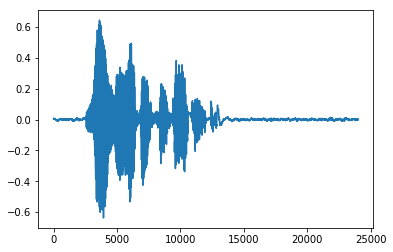

In [68]:
plt.plot(audio)
plt.show()

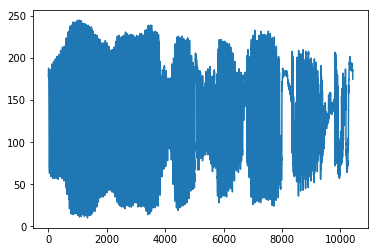

In [85]:
plt.plot(q_audio)
plt.show()

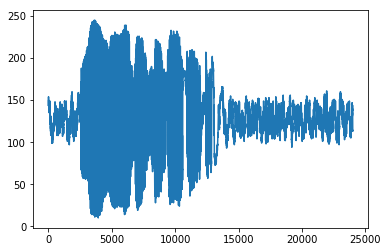

In [88]:
plt.plot(q_audio_2)
plt.show()

In [25]:
for idx, file in enumerate(sound_file):
    
    print(audio.shape)
#     if idx == 0:
#         audio_all = [audio]
#     else: 
#         audio_all = np.append(audio_all, [audio], axis=0)

(80000,)
(80000,)
(64000,)
(64000,)
(80000,)
(48000,)
(80000,)
(80000,)
(64000,)
(48000,)
(64000,)
(64000,)
(80000,)
(48000,)
(80000,)
(80000,)
(80000,)
(80000,)
(64000,)
(64000,)


In [15]:
audio_all[1]

array([0.00604248, 0.00506592, 0.00576782, ..., 0.00042725, 0.00085449,
       0.00054932], dtype=float32)

In [7]:
audio

array([-0.00958252, -0.00918579, -0.00866699, ...,  0.00845337,
        0.00817871,  0.00805664], dtype=float32)

In [8]:
audio_list = normalize_audio(audio_list, SAMPLING_BIT)

In [9]:
audio_list

array([array([2.88709998e-08, 3.02679837e-08, 3.77185643e-08, ...,
       1.81607902e-08, 1.35041773e-08, 1.07102096e-08]),
       array([9.22009349e-08, 7.72997737e-08, 8.80099833e-08, ...,
       6.51925802e-09, 1.30385160e-08, 8.38190317e-09]),
       array([-2.00234354e-08, -1.25728548e-08, -6.98491931e-09, ...,
       -1.26659870e-07, -1.21071935e-07, -1.24797225e-07]),
       array([-1.76951289e-08, -6.98491931e-09, -8.84756446e-09, ...,
       -5.96046448e-08, -6.70552254e-08, -6.89178705e-08]),
       array([ 1.62981451e-08,  2.74740160e-08,  1.81607902e-08, ...,
       -6.89178705e-08, -7.26431608e-08, -7.82310963e-08]),
       array([ 8.80099833e-08,  7.86967576e-08,  6.93835318e-08, ...,
       -4.84287739e-08, -4.47034836e-08, -4.65661287e-08]),
       array([ 4.56348062e-08,  4.37721610e-08,  4.14438546e-08, ...,
       -9.31322575e-09, -1.39698386e-09, -2.74740160e-08]),
       array([1.51339918e-07, 1.56927854e-07, 1.62515789e-07, ...,
       3.72529030e-08, 3.58559191e-

In [91]:
audio_list = mu_law(audio_list, mu=MU)

AttributeError: 'numpy.ndarray' object has no attribute 'log'

In [67]:
audio_list

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         4.37820878e-05,  2.92888689e-05,  8.92106089e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.53453447e-06,  1.24102732e-05,  8.32460035e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.53816520e-05, -1.79818460e-05, -2.23509576e-05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.46879265e-05, -9.58293255e-06, -3.06733063e-06],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -2.76964990e-05, -2.93473397e-05, -3.16233639e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.70029367e-05, -1.65507771e-05, -2.45270173e-05]])

In [68]:
audio_list = quantize(audio_list, MU)

In [60]:
np.savetxt('sample.txt',audio_list)

In [71]:
audio_list[0][10:1000]

array([128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
       128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 12